# Exploring a Taiwan real estate dataset.

***

## Taiwan real estate dataset contains four variables:

     dist_to_mrt_m: Distance to nearest MRT metro station, in meters.
     n_convenience: No. of convenience stores in walking distance.
     house_age_years: The age of the house, in years, in three groups.
     price_twd_msq: House price per unit area, in New Taiwan dollars per meter squared.


In [38]:
#importing our dataset using pandas
import pandas as pd
taiwan_real_estate = pd.read_csv('datasets/taiwan_real_estate.csv')
print(taiwan_real_estate.columns)
print(taiwan_real_estate.shape)
taiwan_real_estate.head(10)

Index(['dist_to_mrt_m', 'n_convenience', 'house_age_years', 'price_twd_msq'], dtype='object')
(414, 4)


,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
5,2175.03000,3,0 to 15,9.712557
6,623.47310,7,30 to 45,12.193646
7,287.60250,6,15 to 30,14.130106
8,5512.03800,1,30 to 45,5.688351
9,1783.18000,3,15 to 30,6.686838


###  House price makes a good response variable, as predicting prices is a common business task. 


#### visualize the relationship between no. of convinience stores and the house price

In [39]:
# importing matplotlib and seaborn for visualization 
# Import seaborn with alias sns
import seaborn as sns
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

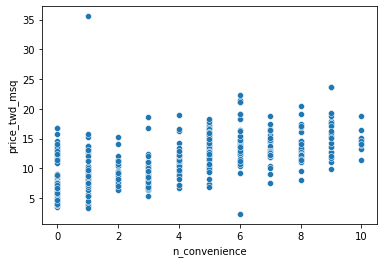

In [40]:
# Draw the scatter plot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate)
# Show the plot
plt.show()

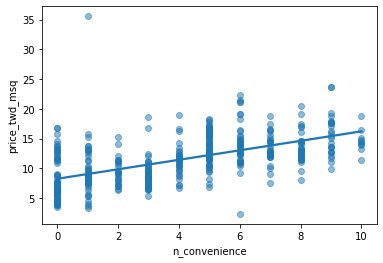

In [41]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, ci=None, scatter_kws={'alpha': 0.5})
# Show the plot
plt.show()

## Linear regression with ols()

***

### Linear Regression between house price and no. of convenience stores.

In [42]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model (intercept and slope)
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


#### On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.
#### If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

###### The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

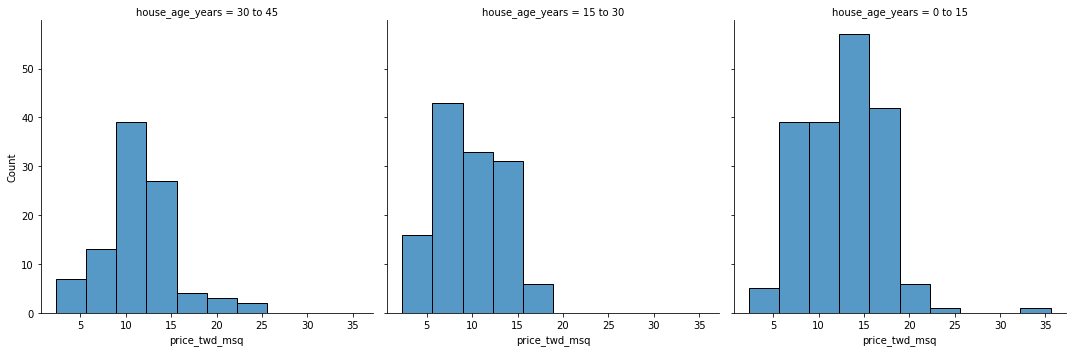

In [43]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate, x='price_twd_msq', col='house_age_years', bins=10)

# Show the plot
plt.show()

###### Grouped means for the house prices in the Taiwan real estate dataset. This will help with understanding the output of a linear regression with a categorical variable.

In [44]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years').price_twd_msq.mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


<AxesSubplot:>

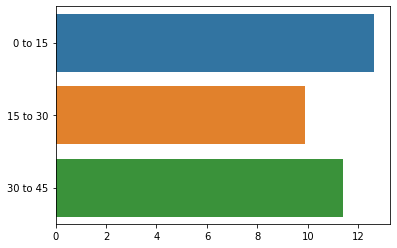

In [45]:
sns.barplot(x=list(mean_price_by_age), y=['0 to 15', '15 to 30', '30 to 45'])

### Linear Regression between house price and house age (categorical variable).

In [46]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


#### there are negative coefficients because the coefficients are relative to the intercept!. we can modifiy the script so that, the coefficients are relative to zero.

In [47]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years +0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## Predicting house prices

In [48]:
# Create a DataFrame of explanatory data, where the number of convenience stores, n_convenience,
#takes the integer values from zero to ten.

#import numpy
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [49]:
# Using mdl_price_vs_conv to predict with explanatory_data.

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


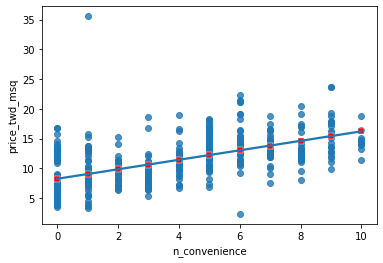

In [50]:
#showing predictions(predictions in red, actual in blue)

# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=prediction_data, color='red', marker='s')

# Show the layered plot
plt.show()

## Studying the relationship between house price and the distance to the nearest metro station.

<AxesSubplot:xlabel='dist_to_mrt_m', ylabel='price_twd_msq'>

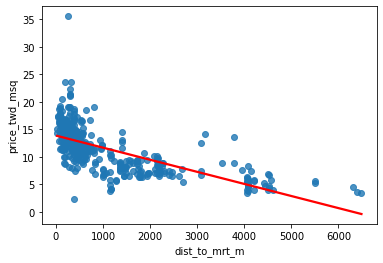

In [51]:
#scatter plot for dist_to_mrt_m vs price_twd_msq
#sns.scatterplot(x='dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate)
sns.regplot(x='dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate, ci=None, line_kws={"color": "red"})

### The relation between dist_to_mrt_m and price_twd_msq is not clear. so, a TRANSFORMATION must be done to one the variables. 
### Trying dist_to_mrt_m squared 

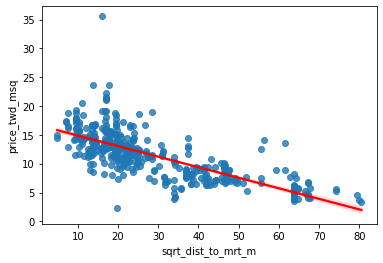

In [52]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()
# Plot using the transformed variable
sns.regplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate, line_kws={'color':'red'})
plt.show()

In [53]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [54]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


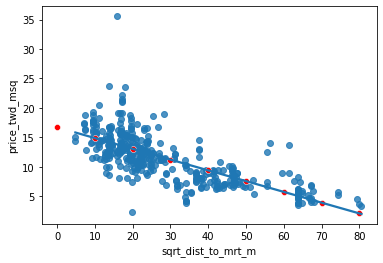

In [55]:
#plotting the prediction and the actual results
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
# Add a layer of your prediction points
sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color='red')
plt.show()

## Drawing diagnostic plots

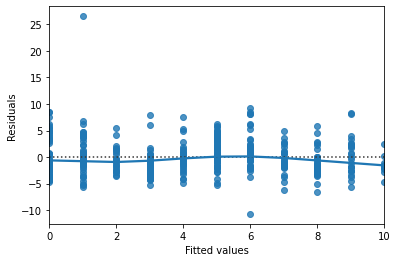

In [56]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

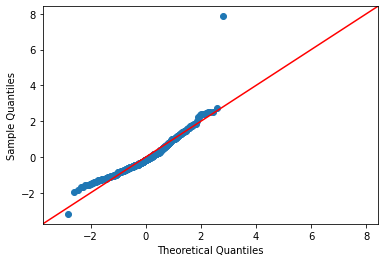

In [57]:
#Q-Q Plot

# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

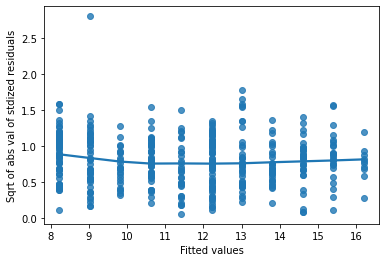

In [58]:
#scale-location plot

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

### Extracting leverage and influence

In [59]:
# Creat summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sorting taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values(by='leverage', ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8             74.243101  0.021142  


In [60]:
# Adding the cooks_d column to taiwan_real_estate.
taiwan_real_estate['cooks_dist'] = summary_info['cooks_d']

# Sorting taiwan_real_estate by cooks_dist in descending order and printing the head.
print(taiwan_real_estate.sort_values(by='cooks_dist', ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  
